In [2]:
# Python
import pandas as pd
from fbprophet import Prophet
url = "C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\example_yosemite_temps.csv"
df = pd.read_csv(url)
print(df.head())
print(df.tail())

                    ds     y
0  2017-05-01 00:00:00  27.8
1  2017-05-01 00:05:00  27.0
2  2017-05-01 00:10:00  26.8
3  2017-05-01 00:15:00  26.5
4  2017-05-01 00:20:00  25.6
                        ds     y
18716  2017-07-04 23:40:00  42.8
18717  2017-07-04 23:45:00  43.0
18718  2017-07-04 23:50:00  42.1
18719  2017-07-04 23:55:00  42.1
18720  2017-07-05 00:00:00  41.4


In [3]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\ivonnics\Anaconda3\envs\PROPHET\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
future = m.make_future_dataframe(periods=2)
print(future.head())
print(future.tail())

                   ds
0 2017-05-01 00:00:00
1 2017-05-01 00:05:00
2 2017-05-01 00:10:00
3 2017-05-01 00:15:00
4 2017-05-01 00:20:00
                       ds
18718 2017-07-04 23:50:00
18719 2017-07-04 23:55:00
18720 2017-07-05 00:00:00
18721 2017-07-06 00:00:00
18722 2017-07-07 00:00:00


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18718,2017-07-04 23:50:00,36.690040,31.187416,42.636829
18719,2017-07-04 23:55:00,36.271335,30.510166,41.748743
18720,2017-07-05 00:00:00,35.841666,30.376706,41.707693
18721,2017-07-06 00:00:00,34.751941,28.727385,40.780892
18722,2017-07-07 00:00:00,34.761973,27.664849,41.699227


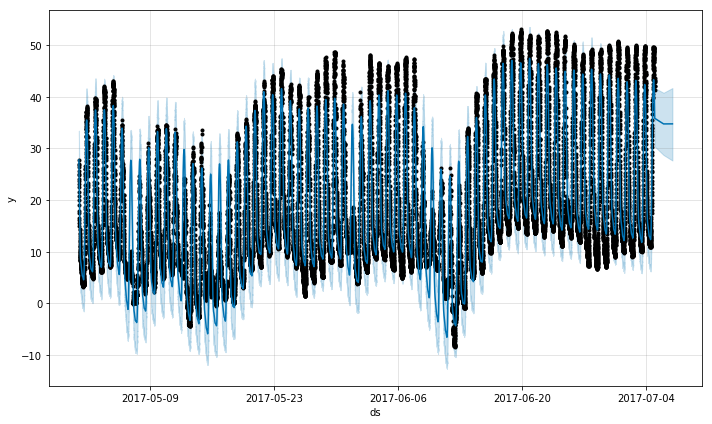

In [6]:
fig1 = m.plot(forecast)

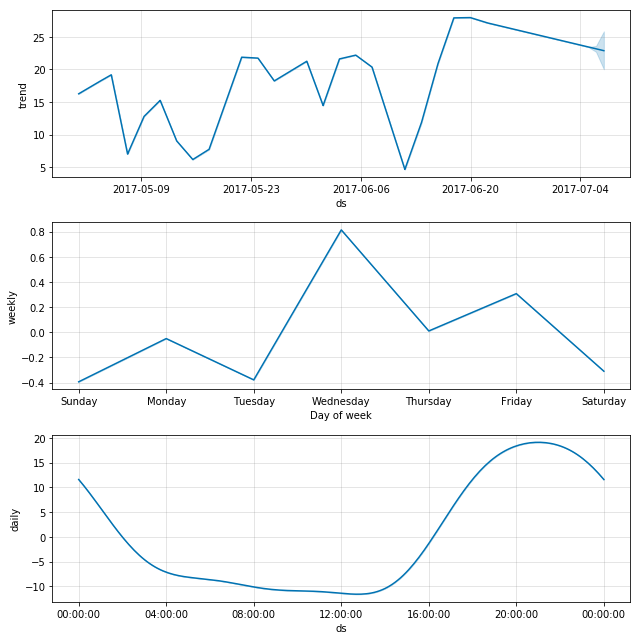

In [7]:
fig2 = m.plot_components(forecast)

# Ejemplo de [Facebook](https://facebook.github.io/prophet/docs/non-daily_data.html):

In [9]:
m1 = Prophet()
m1.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


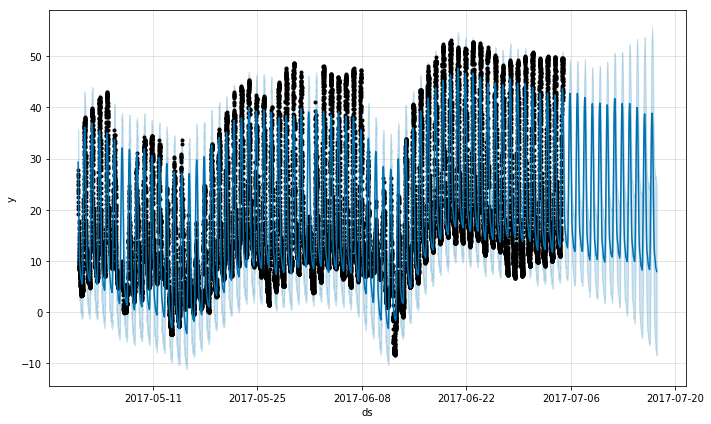

In [10]:
m1 = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m1.make_future_dataframe(periods=300, freq='H')
fcst = m1.predict(future)
fig = m1.plot(fcst)

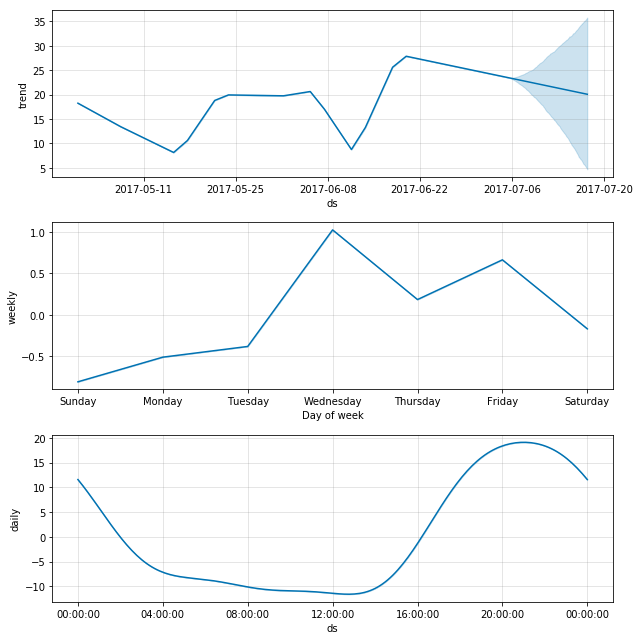

In [15]:
fig4 = m1.plot_components(fcst)